## Introduction

This is a reference notebook to see what plotting would look nicest, so we can make the rest of the course notebooks look consistent :)

![]()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

**Time series**

In [2]:
# Generate some QPSK samples
ints = np.random.randint(0,4,128)
qpsk_scheme = [1+1j, 1-1j, -1+1j, -1-1j]
symbols = np.array([qpsk_scheme[i] for i in ints])
noisy_symbols = symbols + 0.2/np.sqrt(2)*(np.random.randn(len(symbols)) + \
                                          np.random.randn(len(symbols))*1j)

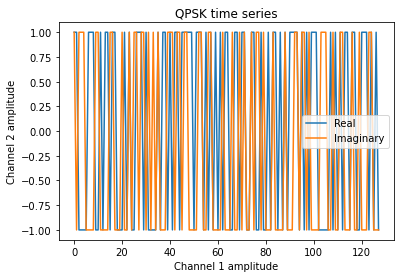

In [3]:
plt.plot(symbols.real)
plt.plot(symbols.imag)
plt.title('QPSK time series')
plt.xlabel('Channel 1 amplitude')
plt.ylabel('Channel 2 amplitude')
plt.legend(('Real', 'Imaginary'))

Text(0, 0.5, 'Channel 2 amplitude')

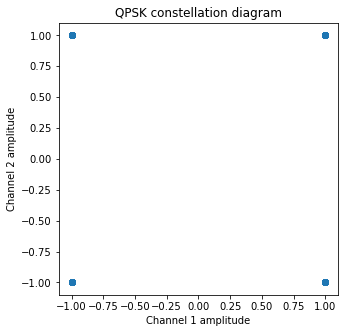

In [4]:
# Simple constellation
plt.figure(figsize=(5,5))
plt.scatter(symbols.real, symbols.imag)
plt.title('QPSK constellation diagram')
plt.xlabel('Channel 1 amplitude')
plt.ylabel('Channel 2 amplitude')

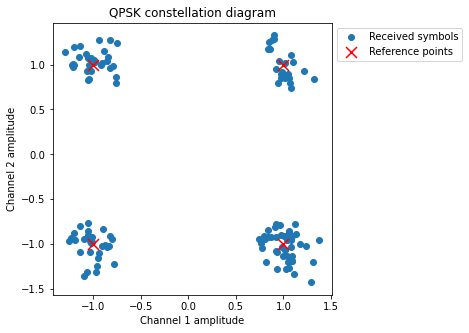

In [5]:
# Constellation with reference markers
plt.figure(figsize=(5,5))
plt.scatter(noisy_symbols.real, noisy_symbols.imag)
plt.scatter(np.real(qpsk_scheme), np.imag(qpsk_scheme), s=120, c='red', marker='x')
plt.title('QPSK constellation diagram')
plt.xlabel('Channel 1 amplitude')
plt.ylabel('Channel 2 amplitude')
plt.legend(('Received symbols', 'Reference points'), \
           bbox_to_anchor=(1, 1), loc='upper left')

Text(0.5, 1.0, 'QPSK constellation with noise')

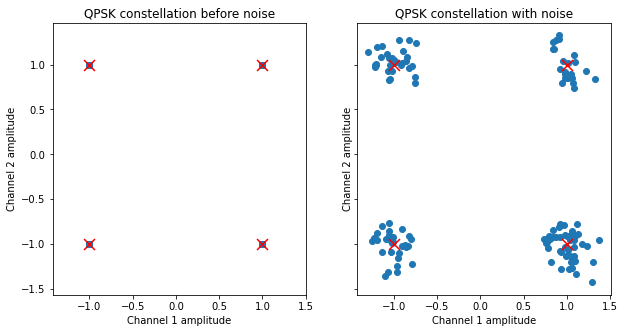

In [6]:
# Side by side constellations
fig, axs = plt.subplots(1,2,figsize=(10,5), sharex='all', sharey='all')
axs[0].scatter(symbols.real, symbols.imag)
axs[0].scatter(np.real(qpsk_scheme), np.imag(qpsk_scheme), s=120, c='red', marker='x')
axs[0].set_xlabel('Channel 1 amplitude')
axs[0].set_ylabel('Channel 2 amplitude')
axs[0].set_title('QPSK constellation before noise')

axs[1].scatter(noisy_symbols.real, noisy_symbols.imag)
axs[1].scatter(np.real(qpsk_scheme), np.imag(qpsk_scheme), s=120, c='red', marker='x')
axs[1].set_xlabel('Channel 1 amplitude')
axs[1].set_ylabel('Channel 2 amplitude')
axs[1].set_title('QPSK constellation with noise')

**Frequency**

In [7]:
# Set basic params
fs = 512 # sample rate
f = 100 # frequency of signal
n_window = 512 # fft size

# create a sampled sinusoid and corresponding frequencies for plotting
sine = np.sin(2*np.pi*f*np.arange(2048)/fs)
freqs = np.fft.fftshift(np.fft.fftfreq(n_window,1/fs))

# calculate fft
sine_fft = np.fft.fftshift(np.fft.fft(sine, n_window))

# convert to dB scale
sine_fft_db = 10*np.log10(abs(sine_fft)/len(sine))

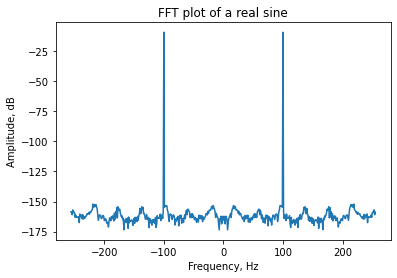

In [8]:
plt.plot(freqs, sine_fft_db)
plt.title('FFT plot of a real sine')
plt.xlabel('Frequency, Hz')
plt.ylabel('Amplitude, dB')
plt.show()

**Histograms**

In [9]:
# Get some random noise
noise = np.random.randn(50000,1)

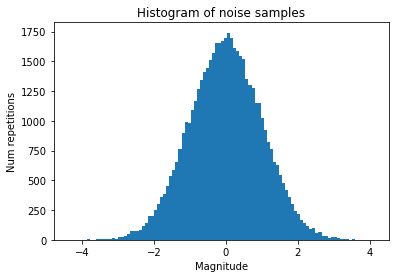

In [10]:
plt.hist(noise, bins=100)
plt.title('Histogram of noise samples')
plt.xlabel('Magnitude')
plt.ylabel('Num repetitions')
plt.show()

**Helper functions**

It might get tedious if all notebooks have to re-use multilines to plot simple things. In which case we could use shared helper functions.

In [3]:
from helper_functions import *

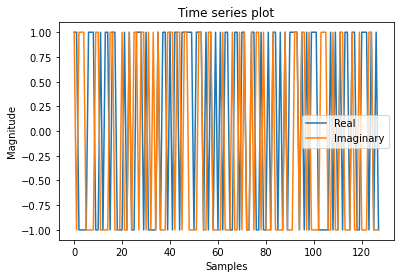

In [12]:
plot_iq_timeseries(symbols)

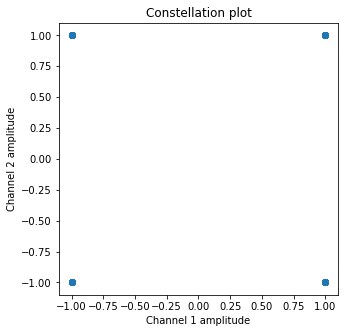

In [13]:
scatterplot(symbols.real, symbols.imag)

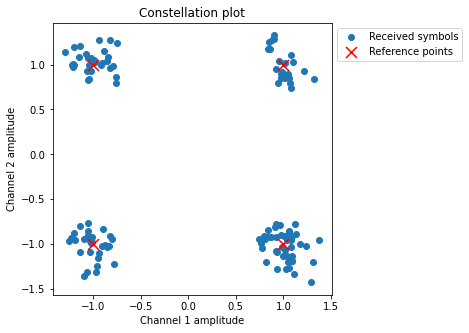

In [14]:
scatterplot_with_ref(noisy_symbols, qpsk_scheme)

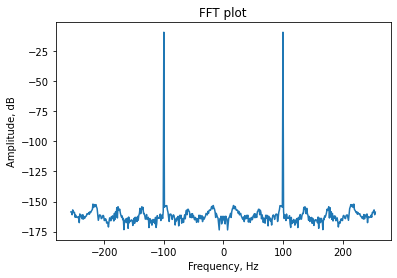

In [15]:
frequency_plot(freqs, sine_fft_db)

The next few helper functions are different subplots with overlap between the required input variables.

In [22]:
#requirements for plotting
fs = 300000 # sample rate 
n_window = 300000 # fft size
samples = np.arange(fs) # the points on the x axis for plotting - 0 to fs
t = samples/fs #samples per sampling rate - amount of time passed to process number of samples - array
freqs = np.fft.fftshift(np.fft.fftfreq(n_window,1/fs)) #frequency domain axis for graphs

find_fft is a helper function which implements the frequency calculations shown above

In [23]:
signal_1 = 200*np.cos(2*np.pi*5000*t) #signals to be plotted
signal_2 = 100*np.cos(2*np.pi*2000*t)

fft_signal_1 = find_fft(signal_1, n_window) #using find_fft helper function
fft_signal_2 = find_fft(signal_2, n_window) #using find_fft helper function

User supplies signal, fft of the signal, total sample, frequency axis (freqs) and 2 titles.

Function outputs subplots showing time domain and a 1 sided frequency domain. Time domain is limited to the first 500 samples for clearer viewing.

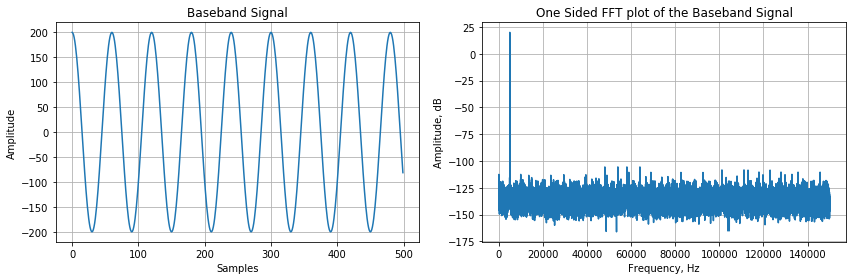

In [24]:
time_title = 'Baseband Signal'
freq_title = 'One Sided FFT plot of the Baseband Signal'
subplots(signal_1, fft_signal_1, samples, freqs, fs, time_title, freq_title)

Same as previous plot but user supplies 2 signals and ffts, as well as labels for the legend.

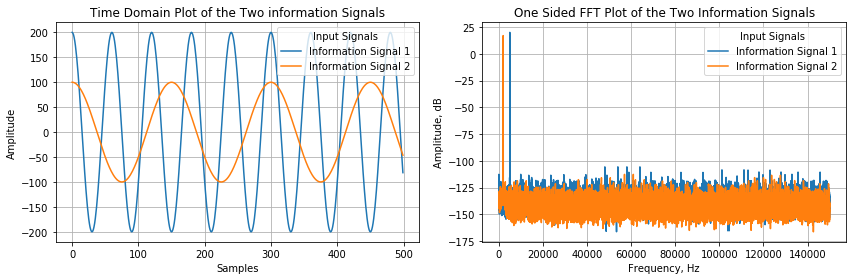

In [26]:
time_title = 'Time Domain Plot of the Two information Signals'
freq_title = 'One Sided FFT Plot of the Two Information Signals'
label_I = 'Information Signal 1'
label_Q = 'Information Signal 2'
legend_title = 'Input Signals'

QAM_subplots(signal_1, signal_2, fft_signal_1, fft_signal_2, samples, freqs, fs, 
             time_title, freq_title, label_I, label_Q, legend_title)

This function helps plot a complex function, I and Q on the time domain plot but only one signal on the frequency domain ploy.

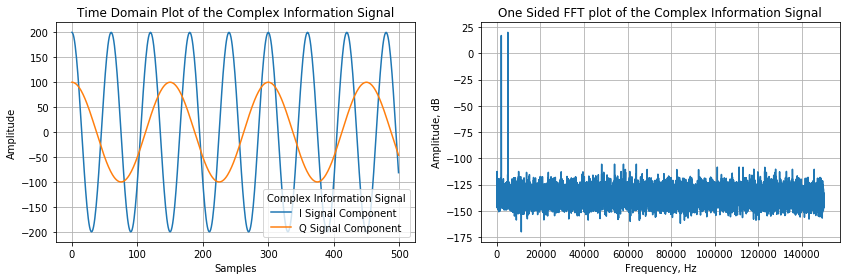

In [28]:
g_complex = signal_1 + 1j*(signal_2)
g_complex_fft_db = find_fft(g_complex, n_window)

time_title = 'Time Domain Plot of the Complex Information Signal'
freq_title = 'One Sided FFT plot of the Complex Information Signal'
label_I = 'I Signal Component'
label_Q = 'Q Signal Component'
legend_title = 'Complex Information Signal'

complex_subplots(g_complex.real, g_complex.imag, g_complex_fft_db, samples, freqs, fs,
                 label_I, label_Q, time_title, freq_title, legend_title)

**Straight up latex**

$a = \frac{b}{d} + \sqrt{c}$

$EVM = \frac{\sqrt{\frac{1}{N} \sum^{N}_{n=1}(I_{rx}(n)-I_{0}(n))^2 + (Q_{rx}(n) - Q_{0}(n))^2}}{\sqrt{I_{0}^2 + Q_{0}^2}}$

Can also mention things like $\alpha$, $\omega$ and $\sigma^{2}$ inline etc.